In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

<AxesSubplot: >

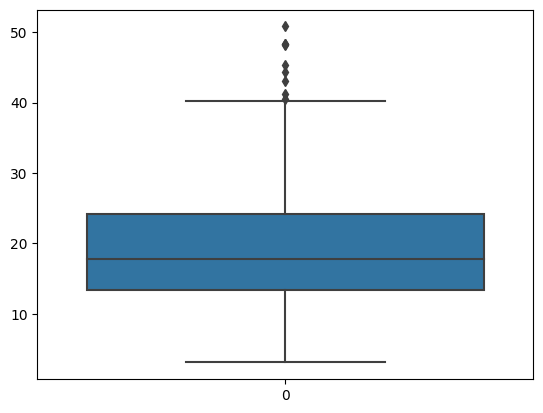

In [6]:
sns.boxplot(df['total_bill'])

In [7]:
# 이상치의 경계 부분을 수치화
import numpy as np

In [8]:
q1, q3 = np.percentile(df['total_bill'], [25, 75])
print(q1, q3)

13.3475 24.127499999999998


In [9]:
# 상단의 경계 (q3 + (iqr * 1.5))
# iqr = q3 - q1
iqr = q3 - q1
iqr

10.779999999999998

In [10]:
upper_bound = q3 + 1.5 * iqr
upper_bound

40.29749999999999

In [11]:
# 하단의 이상치 경계 q1 - (iqr * 1.5)
lower_bound = q1 - 1.5 * iqr
lower_bound

-2.8224999999999945

In [ ]:
df.loc[(df['total_bill'] <= upper_bound) & (df['total_bill'] >= lower_bound)]

In [26]:
def outlier(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    result = np.where( (df[col] <= upper_bound) & (df[col] >= lower_bound) )
    return df.iloc[result]

In [27]:
outlier(df, 'total_bill')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
